<a href="https://colab.research.google.com/github/stanimman/Lectures/blob/master/Actual_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### Linear Regression

In [0]:
# Intro to python 

In [0]:
!git clone https://github.com/jdwittenauer/ipython-notebooks.git

Cloning into 'ipython-notebooks'...
remote: Enumerating objects: 613, done.
remote: Total 613 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (613/613), 33.01 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (309/309), done.


In [0]:
!ls ipython-notebooks/data

bird_small.mat	  ex3data1.mat	  ex7data1.mat	       movie_ids.txt
bird_small.png	  ex3weights.mat  ex7data2.mat	       spamSample1.txt
emailSample1.txt  ex4data1.mat	  ex7faces.mat	       spamSample2.txt
emailSample2.txt  ex4weights.mat  ex8data1.mat	       spamTest.mat
ex1data1.txt	  ex5data1.mat	  ex8data2.mat	       spamTrain.mat
ex1data2.txt	  ex6data1.mat	  ex8_movieParams.mat  stock_data.csv
ex2data1.txt	  ex6data2.mat	  ex8_movies.mat       vocab.txt
ex2data2.txt	  ex6data3.mat	  manning.csv


In [0]:
import pandas as pd
path = 'ipython-notebooks/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Years_of_Experience', 'Salary_in_lakhs'])
data.head()

,Years_of_Experience,Salary_in_lakhs
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


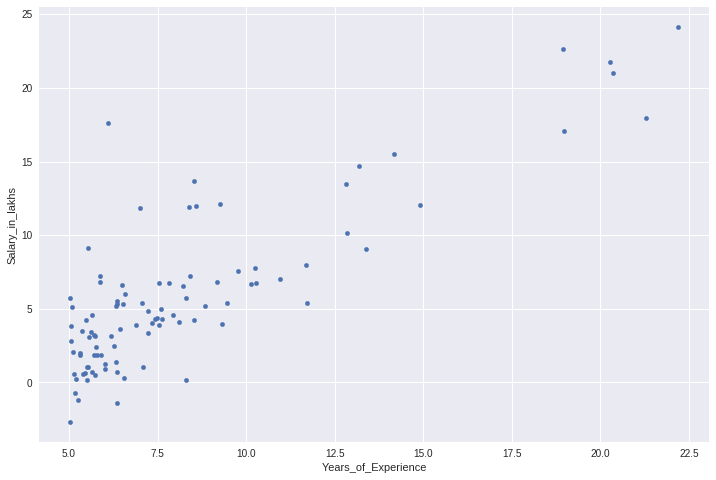

In [0]:
data.plot(kind='scatter', x='Years_of_Experience', y='Salary_in_lakhs', figsize=(12,8))

In [0]:
import numpy as np
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
x = np.array(X[:, 0].A1)
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

Text(0.5,1,'Predicted Salary_in_lakhs vs. Years_of_Experience')

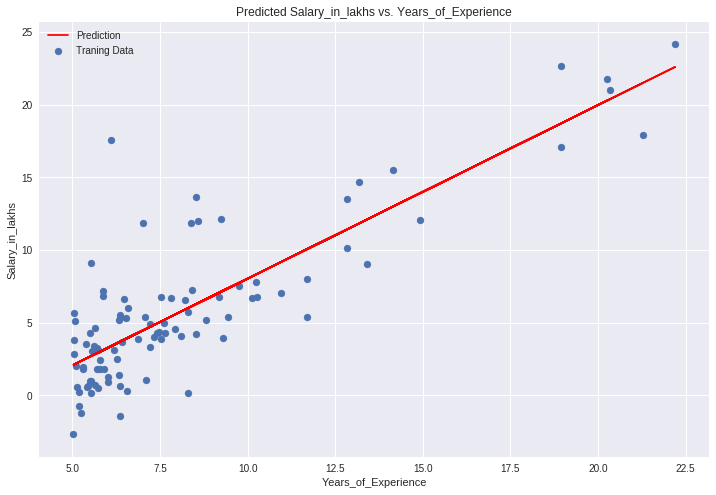

In [0]:
import matplotlib.pyplot as plt
x = np.array(X[:, 0].A1) # A1 change the shape and flattenns the matrix
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Years_of_Experience, data.Salary_in_lakhs, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Years_of_Experience')
ax.set_ylabel('Salary_in_lakhs')
ax.set_title('Predicted Salary_in_lakhs vs. Years_of_Experience')

In [0]:
path = 'ipython-notebooks/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = model.predict(X)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [[  139.21067402 -8738.01911233]]
Mean squared error: 4086560101.21
Variance score: 0.73


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test_u94Q5KV.csv to Test_u94Q5KV.csv
User uploaded file "Test_u94Q5KV.csv" with length 527709 bytes


In [0]:
!ls

ipython-notebooks  sample_data	Test_u94Q5KV.csv  Train_UWu5bXk.csv


In [0]:
get_ipython().magic('matplotlib inline')
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [0]:
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
train.shape

(8523, 12)

In [0]:
test.Item_Identifier.value_counts()

In [0]:
train.isnull().sum()

In [0]:
all_data[all_data.Item_Weight.isnull()]['Item_Weight'].value_count

In [0]:
all_data[all_data.Item_Identifier == 'FDC14'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store
3609,FDC14,14.5,Regular,0.041482,Canned,40.0454,OUT017,2007,NaN,Tier 2,Supermarket Type1
4297,FDC14,14.5,Regular,0.069042,Canned,41.4454,OUT010,1998,NaN,Tier 3,Grocery Store
5760,FDC14,14.5,Regular,0.000000,Canned,41.0454,OUT018,2009,Medium,Tier 3,Supermarket Type2
6257,FDC14,NaN,Regular,0.041049,Canned,41.2454,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
# Drop the Item outlet Sales & Concat the dataframe 
all_data = pd.concat([(train.drop(['Item_Outlet_Sales'],axis=1)),test])

In [0]:
all_data.shape

(14204, 11)

In [0]:
all_data.groupby('Item_Identifier')['Item_Weight'].mean()

In [0]:
all_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Imputed_Weight                  0
dtype: int64

In [0]:
all_data['Imputed_Weight'] = all_data.groupby('Item_Identifier')['Item_Weight'].transform('mean')

In [0]:
all_data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [0]:
all_data.loc[all_data.Outlet_Size.isnull(),'Outlet_Size'] = 'Small'

In [0]:
all_data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [0]:
Tier_Mapping ={'Tier 3':1,'Tier 2':2,'Tier 1':3}
Fat_Mapping = {'Low Fat':'Low Fat', 'Regular':'Regular', 'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}


In [0]:
all_data['Mapped_Tier'] = all_data['Outlet_Location_Type'].map(Tier_Mapping)
all_data['Mapped_Fat'] = all_data['Item_Fat_Content'].map(Fat_Mapping)

In [0]:
all_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Imputed_Weight,Mapped_Tier,Mapped_Fat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,9.30,3,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,5.92,1,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,17.50,3,Low Fat
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,19.20,1,Regular
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,8.93,1,Low Fat


In [0]:
all_data = pd.get_dummies(data=all_data, columns=['Item_Type', 'Outlet_Type','Outlet_Size','Mapped_Fat'])

In [0]:
all_data.iloc[:,10:].head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Mapped_Fat_Low Fat,Mapped_Fat_Regular
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [0]:
#Remove Unwanted Catagorical Variable from the Dataframe
all_data = all_data.drop(['Item_Weight','Item_Identifier','Outlet_Identifier','Outlet_Location_Type','Item_Fat_Content'], axis=1)


In [0]:
all_data_df = all_data

In [0]:
# Cleaning and readying data for scikit learn operation
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    print(len(indices_to_keep))
    return df[indices_to_keep].astype(np.float64)

In [0]:
all_data = clean_dataset(all_data)

14204


In [0]:
all_data[0:10]

array([[0.04886645, 0.92750715, 0.58333333, 0.28252456, 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.05870508, 0.0720684 , 1.        , 0.08127419, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.05103696, 0.46828841, 0.58333333, 0.77076511, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [0]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
all_data = mms.fit_transform(all_data)

In [0]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

In [0]:
X_train.shape

(8523, 30)

In [0]:
y = train['Item_Outlet_Sales']/train['Item_MRP']

In [0]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
get_ipython().magic(u'matplotlib')
import matplotlib as mpl
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
sns.set()

Using matplotlib backend: TkAgg


In [0]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

Text(0,0.5,'rmse')

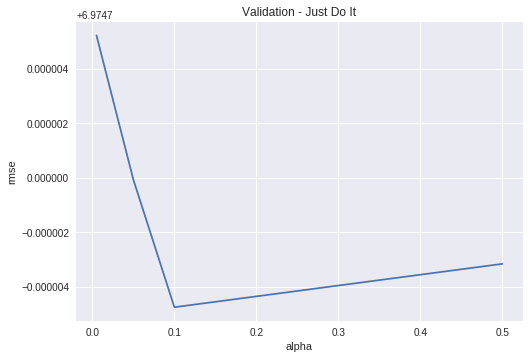

In [0]:
model_ridge = Ridge()
alphas = [0.005,0.05, 0.1,0.5]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [0]:
# Lasso Model
model_lasso = LassoCV().fit(X_train, y)
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

6.967820012099272

In [0]:
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds = model_lasso.predict(X_test)

In [0]:
preds[0:10]

array([16.47183706, 16.55808766,  2.58709863, 16.87310628, 26.49840668,
       16.51605117, 13.74652869, 26.44487125, 16.14677029, 16.91179806])

In [0]:
#Ridge Solution RidgeCV is Ridge regression with built in cross Validation , no need to find alpha seperatly
model_ridge = RidgeCV().fit(X_train, y)
rmse_cv(model_ridge).mean()
preds = model_ridge.predict(X_test)

In [0]:
preds = test['Item_MRP']*preds

In [0]:
preds[0:10]

0    1776.688583
1    1445.848903
2     625.440924
3    2615.905160
4    6206.721797
5    1934.842182
6     688.747826
7    2143.600108
8    1545.949916
9    3160.686528
Name: Item_MRP, dtype: float64

In [0]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,"Outlet_Identifier":test.Outlet_Identifier,"Item_Outlet_Sales":preds})
solution.to_csv("ridge_sol.csv",index= False, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('ridge_sol.csv')